In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Mesothelioma data set.csv")

In [ ]:
print(df.describe().T)

                                  count         mean          std    min  \
age                               324.0    54.743827    11.002637   19.0   
gender                            324.0     0.586420     0.493237    0.0   
city                              324.0     2.530864     2.429623    0.0   
asbestos exposure                 324.0     0.864198     0.343109    0.0   
type of MM                        324.0     0.052469     0.261622    0.0   
duration of asbestos exposure     324.0    30.188272    16.419945    0.0   
diagnosis method                  324.0     0.703704     0.457330    0.0   
keep side                         324.0     0.759259     0.565308    0.0   
cytology                          324.0     0.280864     0.450116    0.0   
duration of symptoms              324.0     5.442901     4.717792    0.5   
dyspnoea                          324.0     0.817901     0.386523    0.0   
ache on chest                     324.0     0.682099     0.466381    0.0   
weakness    

In [ ]:
print(df.isnull().sum())
#df = df.dropna()

age                                 0
gender                              0
city                                0
asbestos exposure                   0
type of MM                          0
duration of asbestos exposure       0
diagnosis method                    0
keep side                           0
cytology                            0
duration of symptoms                0
dyspnoea                            0
ache on chest                       0
weakness                            0
habit of cigarette                  0
performance status                  0
white blood                         0
cell count (WBC)                    0
hemoglobin (HGB)                    0
platelet count (PLT)                0
sedimentation                       0
blood lactic dehydrogenise (LDH)    0
alkaline phosphatise (ALP)          0
total protein                       0
albumin                             0
glucose                             0
pleural lactic dehydrogenise        0
pleural prot

In [ ]:
#Rename Dataset to Label to make it easy to understand
df = df.rename(columns={'class of diagnosis':'Label'})
print(df.dtypes)

age                                 float64
gender                                int64
city                                  int64
asbestos exposure                     int64
type of MM                          float64
duration of asbestos exposure       float64
diagnosis method                      int64
keep side                             int64
cytology                              int64
duration of symptoms                float64
dyspnoea                              int64
ache on chest                         int64
weakness                              int64
habit of cigarette                    int64
performance status                    int64
white blood                         float64
cell count (WBC)                      int64
hemoglobin (HGB)                      int64
platelet count (PLT)                float64
sedimentation                       float64
blood lactic dehydrogenise (LDH)    float64
alkaline phosphatise (ALP)          float64
total protein                   

<Axes: xlabel='Label', ylabel='count'>

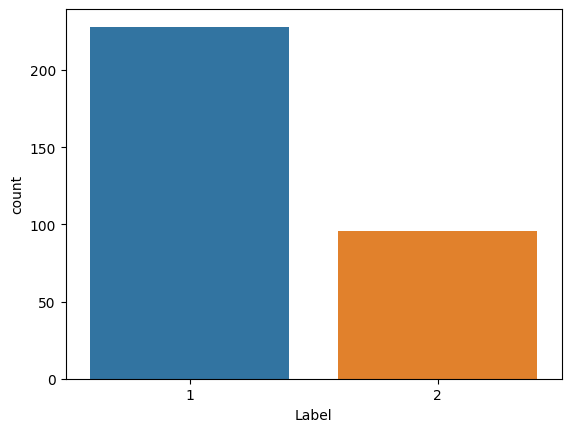

In [ ]:
#Understand the data
sns.countplot(x="Label", data=df) #1 - healthy   B - mesothelioma

In [ ]:
####### Replace categorical values with numbers########
print("Distribution of data: ", df['Label'].value_counts())

#Define the dependent variable that needs to be predicted (labels)
y = df["Label"].values
print("Labels before encoding are: ", np.unique(y))

# Encoding categorical data from text (1 and 2) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # Mesothelioma=1 and Healthy=0
print("Labels after encoding are: ", np.unique(Y))

Labels after encoding are:  [0 1]


In [ ]:
#Define x and normalize/scale values

#Define the independent variables. Drop label, and normalize other data
X = df.drop(labels = ["Label"], axis=1)
print(X.describe().T) #Needs scaling

                                  count         mean          std    min  \
age                               324.0    54.743827    11.002637   19.0   
gender                            324.0     0.586420     0.493237    0.0   
city                              324.0     2.530864     2.429623    0.0   
asbestos exposure                 324.0     0.864198     0.343109    0.0   
type of MM                        324.0     0.052469     0.261622    0.0   
duration of asbestos exposure     324.0    30.188272    16.419945    0.0   
diagnosis method                  324.0     0.703704     0.457330    0.0   
keep side                         324.0     0.759259     0.565308    0.0   
cytology                          324.0     0.280864     0.450116    0.0   
duration of symptoms              324.0     5.442901     4.717792    0.5   
dyspnoea                          324.0     0.817901     0.386523    0.0   
ache on chest                     324.0     0.682099     0.466381    0.0   
weakness    

In [ ]:
#Scale / normalize the values to bring them to similar range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)  #Scaled values

[[0.42424242 1.         0.         ... 0.         0.         0.25      ]
 [0.54545455 1.         0.         ... 1.         1.         0.33695652]
 [0.15151515 1.         0.125      ... 0.         0.         0.34782609]
 ...
 [0.59090909 1.         0.75       ... 0.         1.         0.61956522]
 [0.34848485 1.         0.75       ... 1.         0.         0.72826087]
 [0.53030303 1.         0.         ... 1.         0.         0.36956522]]


In [ ]:
#Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (243, 34)
Shape of testing data is:  (81, 34)


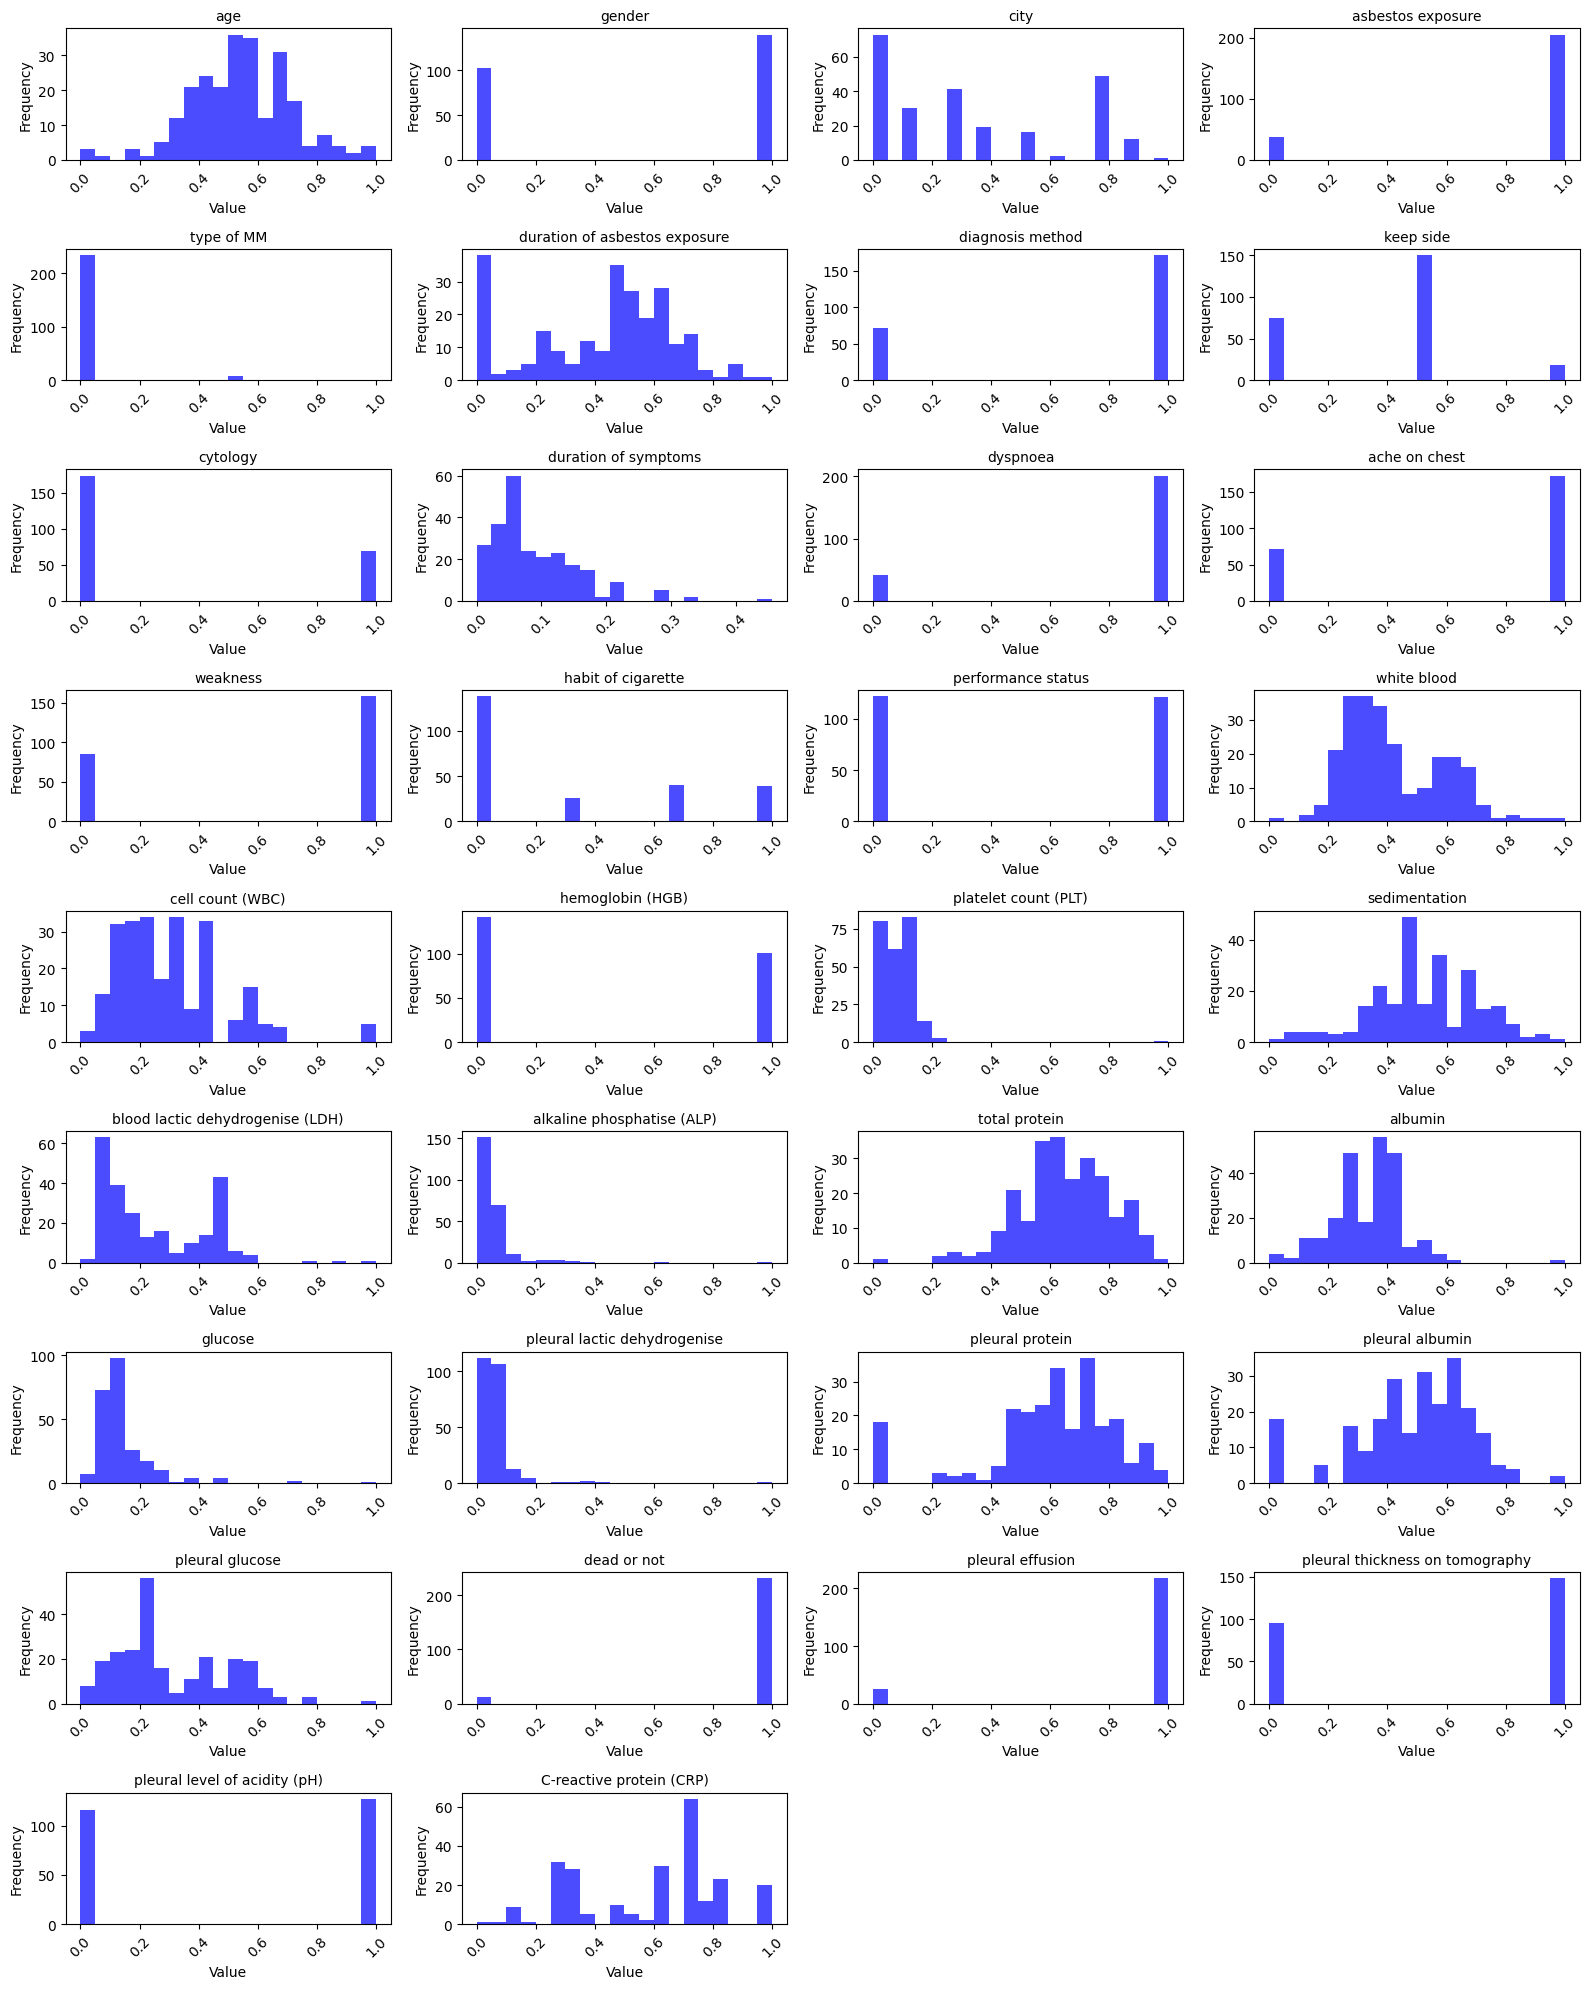

In [ ]:
# X_train contains feature data
feature_names = [
    "age", "gender", "city", "asbestos exposure", "type of MM", "duration of asbestos exposure",
    "diagnosis method", "keep side", "cytology", "duration of symptoms", "dyspnoea", "ache on chest",
    "weakness", "habit of cigarette", "performance status", "white blood", "cell count (WBC)", "hemoglobin (HGB)",
    "platelet count (PLT)", "sedimentation", "blood lactic dehydrogenise (LDH)", "alkaline phosphatise (ALP)",
    "total protein", "albumin", "glucose", "pleural lactic dehydrogenise", "pleural protein", "pleural albumin",
    "pleural glucose", "dead or not", "pleural effusion", "pleural thickness on tomography", "pleural level of acidity (pH)",
    "C-reactive protein (CRP)"
]

# Plot histograms for each feature in the training data
plt.figure(figsize=(16, 20))  # Adjust figsize based on the number of features
for i in range(X_train.shape[1]):
    plt.subplot(9, 4, i+1)  # Adjust the subplot layout based on the number of features
    plt.hist(X_train[:, i], bins=20, color='blue', alpha=0.7)
    plt.title(feature_names[i], fontsize=10)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

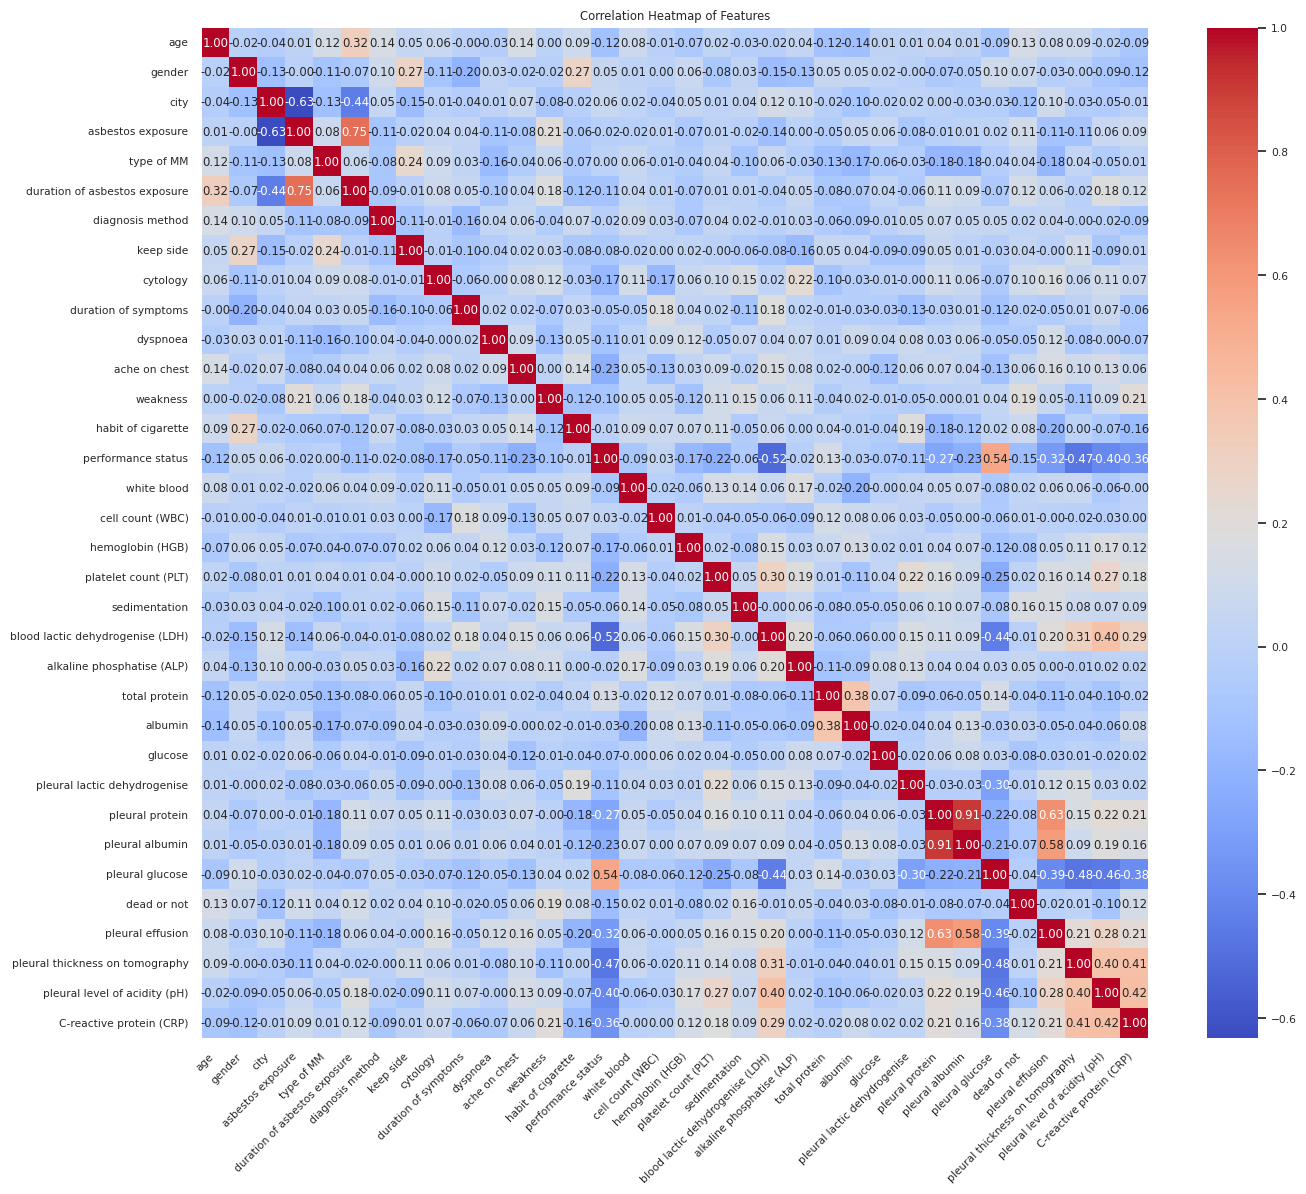

In [ ]:
# Calculate the correlation matrix
corr_matrix = np.corrcoef(X_train, rowvar=False)

# Create a heatmap
plt.figure(figsize=(14, 12))
sns.set(font_scale=0.7)  # Adjust font scale for labels

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=feature_names, yticklabels=feature_names)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align to the right
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.title("Correlation Heatmap of Features")
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=34, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                560       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Fit with no early stopping or other callbacks
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64,
                    validation_data=(X_test, y_test))


Epoch 1/100
4/4 [==============================] - 6s 71ms/step - loss: 0.7274 - accuracy: 0.4609 - val_loss: 0.7512 - val_accuracy: 0.3086
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 0.7070 - accuracy: 0.4897 - val_loss: 0.7307 - val_accuracy: 0.4074
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 0.6882 - accuracy: 0.5679 - val_loss: 0.7134 - val_accuracy: 0.5185
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6772 - accuracy: 0.6255 - val_loss: 0.6980 - val_accuracy: 0.6420
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 0.6656 - accuracy: 0.6502 - val_loss: 0.6844 - val_accuracy: 0.6667
Epoch 6/100
4/4 [==============================] - 0s 19ms/step - loss: 0.6455 - accuracy: 0.6914 - val_loss: 0.6727 - val_accuracy: 0.6914
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss: 0.6404 - accuracy: 0.6914 - val_loss: 0.6629 - val_accuracy: 0.7037
Epoch 8/100
4/4 [===

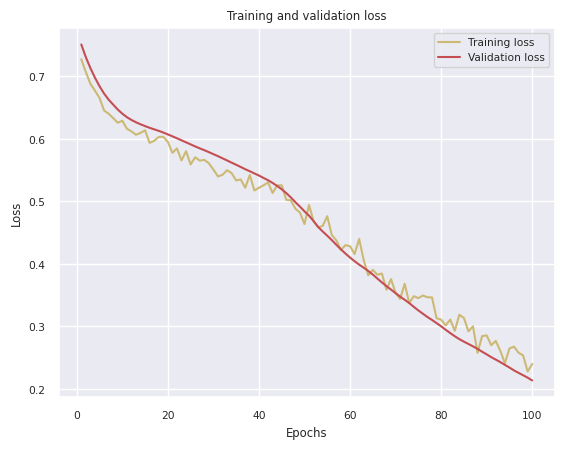

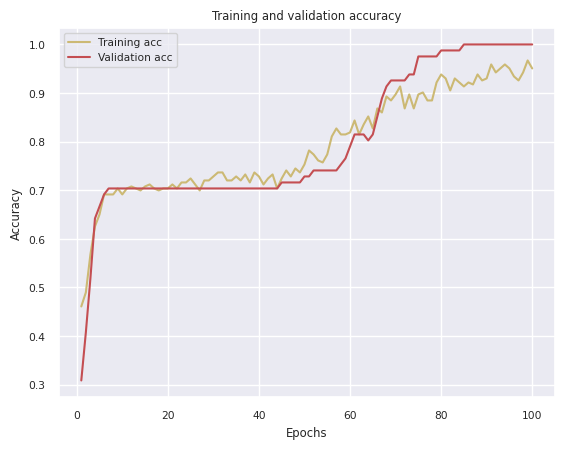

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

3/3 [==============================] - 0s 5ms/step


<Axes: >

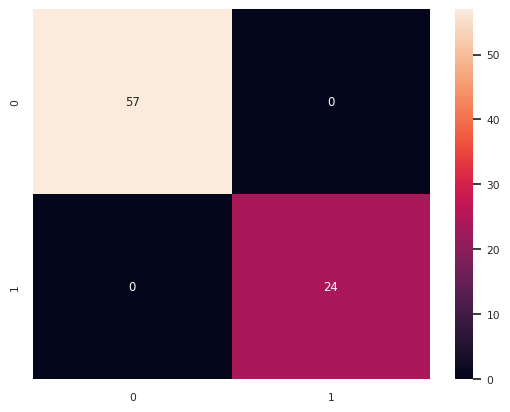

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)